
#Preparation


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import re

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Creating CSV Files from all sqlite files

In [9]:
db_path = '/content/drive/MyDrive/Master/R1_Performance/perf_normal_op.db'

conn = sqlite3.connect(db_path)

query = 'SELECT * FROM log_all_810429887'

df = pd.read_sql_query(query, conn)

df['datetime'] = pd.to_datetime(
    df['Arp.Plc.Eclr/code.RTC_DT.YEAR'].astype(str) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.MONTH'].astype(str).str.zfill(2) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.DAY'].astype(str).str.zfill(2) + ' ' +
    df['Arp.Plc.Eclr/code.RTC_DT.HOURS'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.MINUTES'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.SECONDS'].astype(str).str.zfill(2)
)

df_normal_operation = df

df_normal_operation['Total_Exec_Duration'] = (
    df_normal_operation['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_EXEC_DURATION'] +
    df_normal_operation['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_EXEC_DURATION']
)

df_normal_operation['Total_Activation_delay'] = (
    df_normal_operation['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_ACTIVATION_DELAY'] +
    df_normal_operation['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_ACTIVATION_DELAY']
)

df_normal_operation.to_csv('/content/drive/MyDrive/Master/R1_Performance/perf_DB_normal_operation.csv', index=False)

conn.close()

In [10]:
db_path = '/content/drive/MyDrive/Master/R1_Performance/perf_log_en.db'

conn = sqlite3.connect(db_path)

query = 'SELECT * FROM log_all_810429887'

df = pd.read_sql_query(query, conn)

df['datetime'] = pd.to_datetime(
    df['Arp.Plc.Eclr/code.RTC_DT.YEAR'].astype(str) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.MONTH'].astype(str).str.zfill(2) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.DAY'].astype(str).str.zfill(2) + ' ' +
    df['Arp.Plc.Eclr/code.RTC_DT.HOURS'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.MINUTES'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.SECONDS'].astype(str).str.zfill(2)
)

df_logging_enable = df

df_logging_enable['Total_Exec_Duration'] = (
    df_logging_enable['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_EXEC_DURATION'] +
    df_logging_enable['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_EXEC_DURATION']
)

df_logging_enable['Total_Activation_delay'] = (
    df_logging_enable['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_ACTIVATION_DELAY'] +
    df_logging_enable['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_ACTIVATION_DELAY']
)

df_logging_enable.to_csv('/content/drive/MyDrive/Master/R1_Performance/perf_DB_logging_enable.csv', index=False)

conn.close()

In [11]:
db_path = '/content/drive/MyDrive/Master/R1_Performance/perf_log_attack.db'

conn = sqlite3.connect(db_path)

query = 'SELECT * FROM log_all_810429887'

df = pd.read_sql_query(query, conn)

df['datetime'] = pd.to_datetime(
    df['Arp.Plc.Eclr/code.RTC_DT.YEAR'].astype(str) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.MONTH'].astype(str).str.zfill(2) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.DAY'].astype(str).str.zfill(2) + ' ' +
    df['Arp.Plc.Eclr/code.RTC_DT.HOURS'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.MINUTES'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.SECONDS'].astype(str).str.zfill(2)
)

time_filter = (
    ((df['Arp.Plc.Eclr/code.RTC_DT.HOURS'] == 21) & (df['Arp.Plc.Eclr/code.RTC_DT.MINUTES'] >= 57)) |
    (df['Arp.Plc.Eclr/code.RTC_DT.HOURS'] == 22) |
    (df['Arp.Plc.Eclr/code.RTC_DT.HOURS'] == 23) |
    ((df['Arp.Plc.Eclr/code.RTC_DT.HOURS'] == 0) & (df['Arp.Plc.Eclr/code.RTC_DT.MINUTES'] <= 10))
)

df_logging_attack = df[time_filter].reset_index(drop=True)

df_logging_attack['Total_Exec_Duration'] = (
    df_logging_attack['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_EXEC_DURATION'] +
    df_logging_attack['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_EXEC_DURATION']
)

df_logging_attack['Total_Activation_delay'] = (
    df_logging_attack['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_ACTIVATION_DELAY'] +
    df_logging_attack['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_ACTIVATION_DELAY']
)

df_logging_attack.to_csv('/content/drive/MyDrive/Master/R1_Performance/perf_DB_logging_attack.csv', index=False)

conn.close()

###This contains the extraction of the Stress test for the Execution Count

In [12]:
db_path = '/content/drive/MyDrive/Master/R1_Performance/perf_stress_test.db'

conn = sqlite3.connect(db_path)

query = 'SELECT * FROM log_all_810429887'

df = pd.read_sql_query(query, conn)

df['datetime'] = pd.to_datetime(
    df['Arp.Plc.Eclr/code.RTC_DT.YEAR'].astype(str) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.MONTH'].astype(str).str.zfill(2) + '-' +
    df['Arp.Plc.Eclr/code.RTC_DT.DAY'].astype(str).str.zfill(2) + ' ' +
    df['Arp.Plc.Eclr/code.RTC_DT.HOURS'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.MINUTES'].astype(str).str.zfill(2) + ':' +
    df['Arp.Plc.Eclr/code.RTC_DT.SECONDS'].astype(str).str.zfill(2)
)


split_time = (
    (df['Arp.Plc.Eclr/code.RTC_DT.HOURS'] == 23) &
    (df['Arp.Plc.Eclr/code.RTC_DT.MINUTES'] == 56) &
    (df['Arp.Plc.Eclr/code.RTC_DT.SECONDS'] == 00)
)

split_index = df[split_time].index[0]

df_logging_enable = df.iloc[:split_index].reset_index(drop=True)
df_stress_test = df.iloc[split_index:].reset_index(drop=True)

df_logging_enable['Total_Exec_Duration'] = (
    df_logging_enable['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_EXEC_DURATION'] +
    df_logging_enable['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_EXEC_DURATION']
)

df_logging_enable['Total_Activation_delay'] = (
    df_logging_enable['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_ACTIVATION_DELAY'] +
    df_logging_enable['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_ACTIVATION_DELAY']
)

df_stress_test['Total_Exec_Duration'] = (
    df_stress_test['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_EXEC_DURATION'] +
    df_stress_test['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_EXEC_DURATION']
)

df_stress_test['Total_Activation_delay'] = (
    df_stress_test['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_ACTIVATION_DELAY'] +
    df_stress_test['Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_ACTIVATION_DELAY']
)

df_stress_test.to_csv('/content/drive/MyDrive/Master/R1_Performance/perf_DB_stress_test.csv', index=False)

conn.close()

#Analyzing

##Memory Usage


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def compare_memory_usage(df1, df2, df3, names):

    dfs = [df1, df2, df3]
    stats = []

    def fit_slope(x, y):
        m, b = np.polyfit(x, y, 1)
        return m, b

    slopes = []

    def convert_to_kb(bytes_value):
        return bytes_value / 1024

    plt.figure(figsize=(14, 8))
    for i, df in enumerate(dfs):
        df['Time_Since_Start_Minutes'] = (df['datetime'] - df['datetime'].min()).dt.total_seconds() / 60

        df['Arp.Plc.Eclr/code.USER_PART_DT.MEM_USED_KB'] = df['Arp.Plc.Eclr/code.USER_PART_DT.MEM_USED'].apply(convert_to_kb)

        used_memory_rate = (df['Arp.Plc.Eclr/code.USER_PART_DT.MEM_USED_KB'].diff().mean()) / (df.index[1] - df.index[0]) if len(df) > 1 else 0
        avg_free_memory = convert_to_kb(df['Arp.Plc.Eclr/code.USER_PART_DT.MEM_FREE'].mean())
        max_used_memory = convert_to_kb(df['Arp.Plc.Eclr/code.USER_PART_DT.MEM_USED'].max())
        min_used_memory = convert_to_kb(df['Arp.Plc.Eclr/code.USER_PART_DT.MEM_USED'].min())

        stats.append({
            'Scenario': names[i],
            'Used Memory Rate (KB/min)': used_memory_rate,
            'Average Free Memory (KB)': avg_free_memory,
            'Max Used Memory (KB)': max_used_memory,
            'Min Used Memory (KB)': min_used_memory
        })

        x = df['Time_Since_Start_Minutes']
        y = df['Arp.Plc.Eclr/code.USER_PART_DT.MEM_USED_KB']
        plt.plot(x, y, label=f'{names[i]} - Memory Used (KB)')

        m, b = fit_slope(x, y)
        slopes.append((m, b))

    plt.title('Memory Usage Over Time for Different Scenarios (KB)', fontsize=18)
    plt.xlabel('Time Since Start (minutes)', fontsize=14)
    plt.ylabel('Used Memory (KB)', fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    plt.figure(figsize=(14, 8))
    for i, df in enumerate(dfs):
        x = df['Time_Since_Start_Minutes']
        m, b = slopes[i]
        plt.plot(x, m * x + b, label=f'{names[i]} - Slope: y = {b:.2f} + {m:.2f}x')

    plt.title('Memory Usage Slopes for Different Scenarios (KB)', fontsize=18)
    plt.xlabel('Time Since Start (minutes)', fontsize=14)
    plt.ylabel('Memory Usage Trend Line (KB)', fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    stats_df = pd.DataFrame(stats)
    print(stats_df)


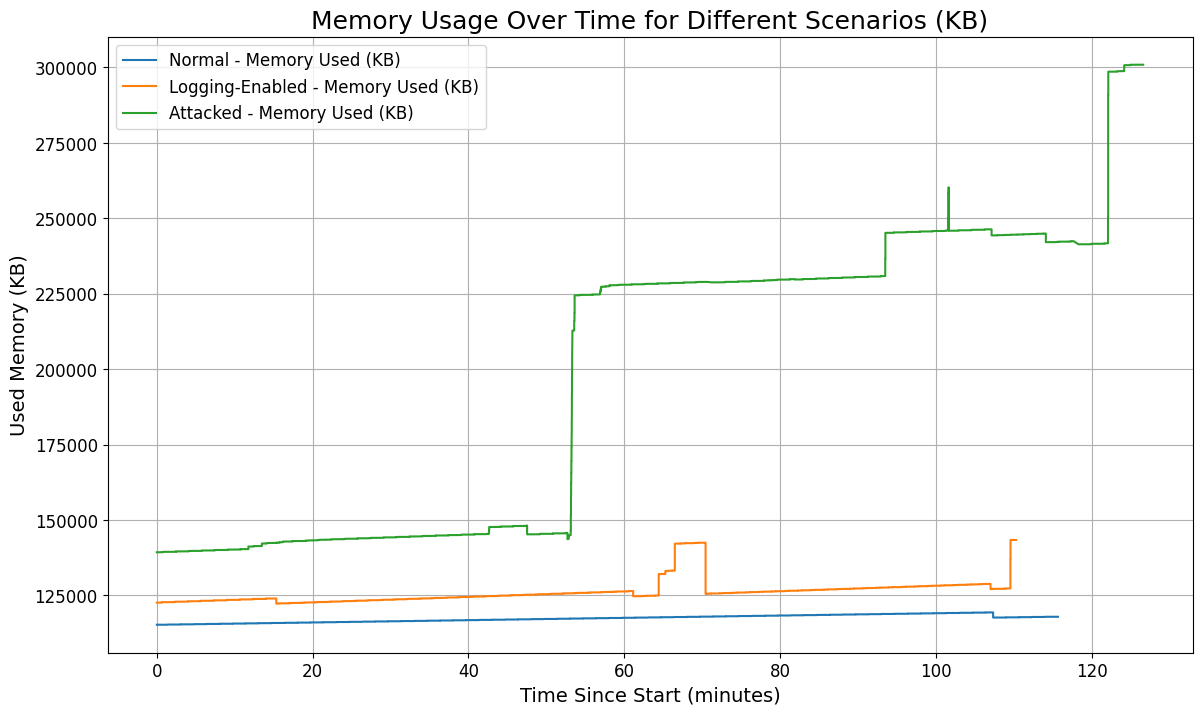

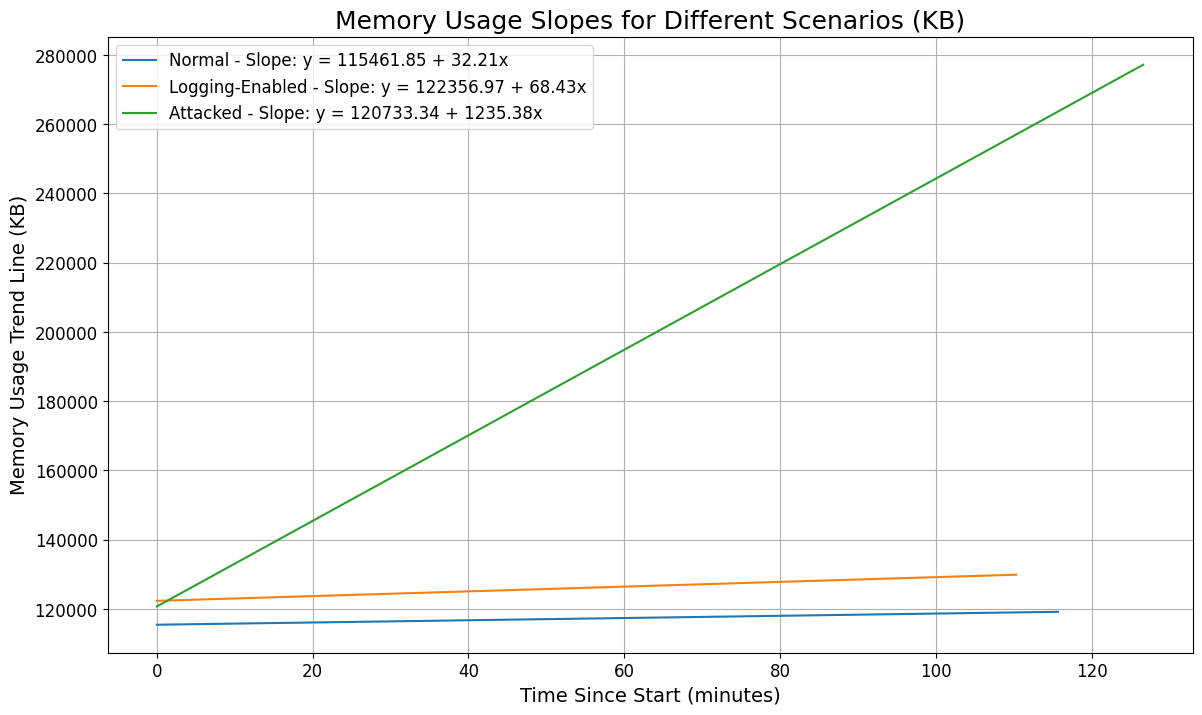

          Scenario  Used Memory Rate (KB/min)  Average Free Memory (KB)  \
0           Normal                   0.037979             345634.980391   
1  Logging-Enabled                   0.314023             336827.531178   
2         Attacked                   2.148126             264383.972464   

   Max Used Memory (KB)  Min Used Memory (KB)  
0              119336.0              115256.0  
1              143364.0              122256.0  
2              300920.0              139280.0  


In [34]:
compare_memory_usage(df_normal_operation, df_logging_enable, df_logging_attack, ['Normal', 'Logging-Enabled', 'Attacked'])


##Cycle time

In [10]:
import matplotlib.colors as mcolors

def compare_cycle_times(df1, df2, df3, names):
    dfs = [df1, df2, df3]
    stats = []

    for i, df in enumerate(dfs):
        df['Time_Since_Start_Minutes'] = (df['datetime'] - df['datetime'].min()).dt.total_seconds() / 60

    for i, df in enumerate(dfs):
        stats.append({
            'Name': names[i],
            'Mean': df['Total_Exec_Duration'].mean(),
            'Max': df['Total_Exec_Duration'].max(),
            'Std': df['Total_Exec_Duration'].std(),
            'Number of Outliers': len(df[(df['Total_Exec_Duration'] > df['Total_Exec_Duration'].quantile(0.95)) |
                                         (df['Total_Exec_Duration'] < df['Total_Exec_Duration'].quantile(0.05))]),
            '25th Percentile': df['Total_Exec_Duration'].quantile(0.25),
            '50th Percentile': df['Total_Exec_Duration'].quantile(0.50),
            '75th Percentile': df['Total_Exec_Duration'].quantile(0.75)
        })

    stats_df = pd.DataFrame(stats)
    print(stats_df)

    cmap = plt.get_cmap("coolwarm")

    fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
    for i, df in enumerate(dfs):
        colors = cmap(df['Total_Exec_Duration'] / df['Total_Exec_Duration'].max())
        axes[i].scatter(df['Time_Since_Start_Minutes'], df['Total_Exec_Duration'], color=colors, alpha=0.7)
        axes[i].plot(df['Time_Since_Start_Minutes'], df['Total_Exec_Duration'].rolling(window=200).mean(), color='black', linestyle='--')
        axes[i].set_title(f"{names[i]} Cycle Time Over Time", fontsize=16)
        axes[i].set_ylabel('Cycle Time (ms)', fontsize=14)
        axes[i].legend(fontsize=12)
        axes[i].grid(True)

    plt.xlabel('Time Since Start (minutes)', fontsize=20)
    plt.tight_layout()
    plt.show()

    # Boxplot with color-coded cycles
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[df1['Total_Exec_Duration'].values, df2['Total_Exec_Duration'].values, df3['Total_Exec_Duration'].values], orient="h", palette="coolwarm")
    plt.title('Cycle Time Boxplot Comparison', fontsize=16)
    plt.yticks([0, 1, 2], names, fontsize=20)
    plt.xlabel('Cycle Time (ms)', fontsize=20)
    plt.grid(True)
    plt.show()


                         Name        Mean   Max         Std  \
0           Normal Cycle Time  436.264815  1583   94.842658   
1  Logging-Enabled Cycle Time  529.154985  1682  142.885182   
2         Attacked Cycle Time  508.804181  2131  143.058433   

   Number of Outliers  25th Percentile  50th Percentile  75th Percentile  
0                6678            384.0            402.0            429.0  
1                6578            409.0            516.0            574.0  
2                7368            406.0            447.0            575.0  


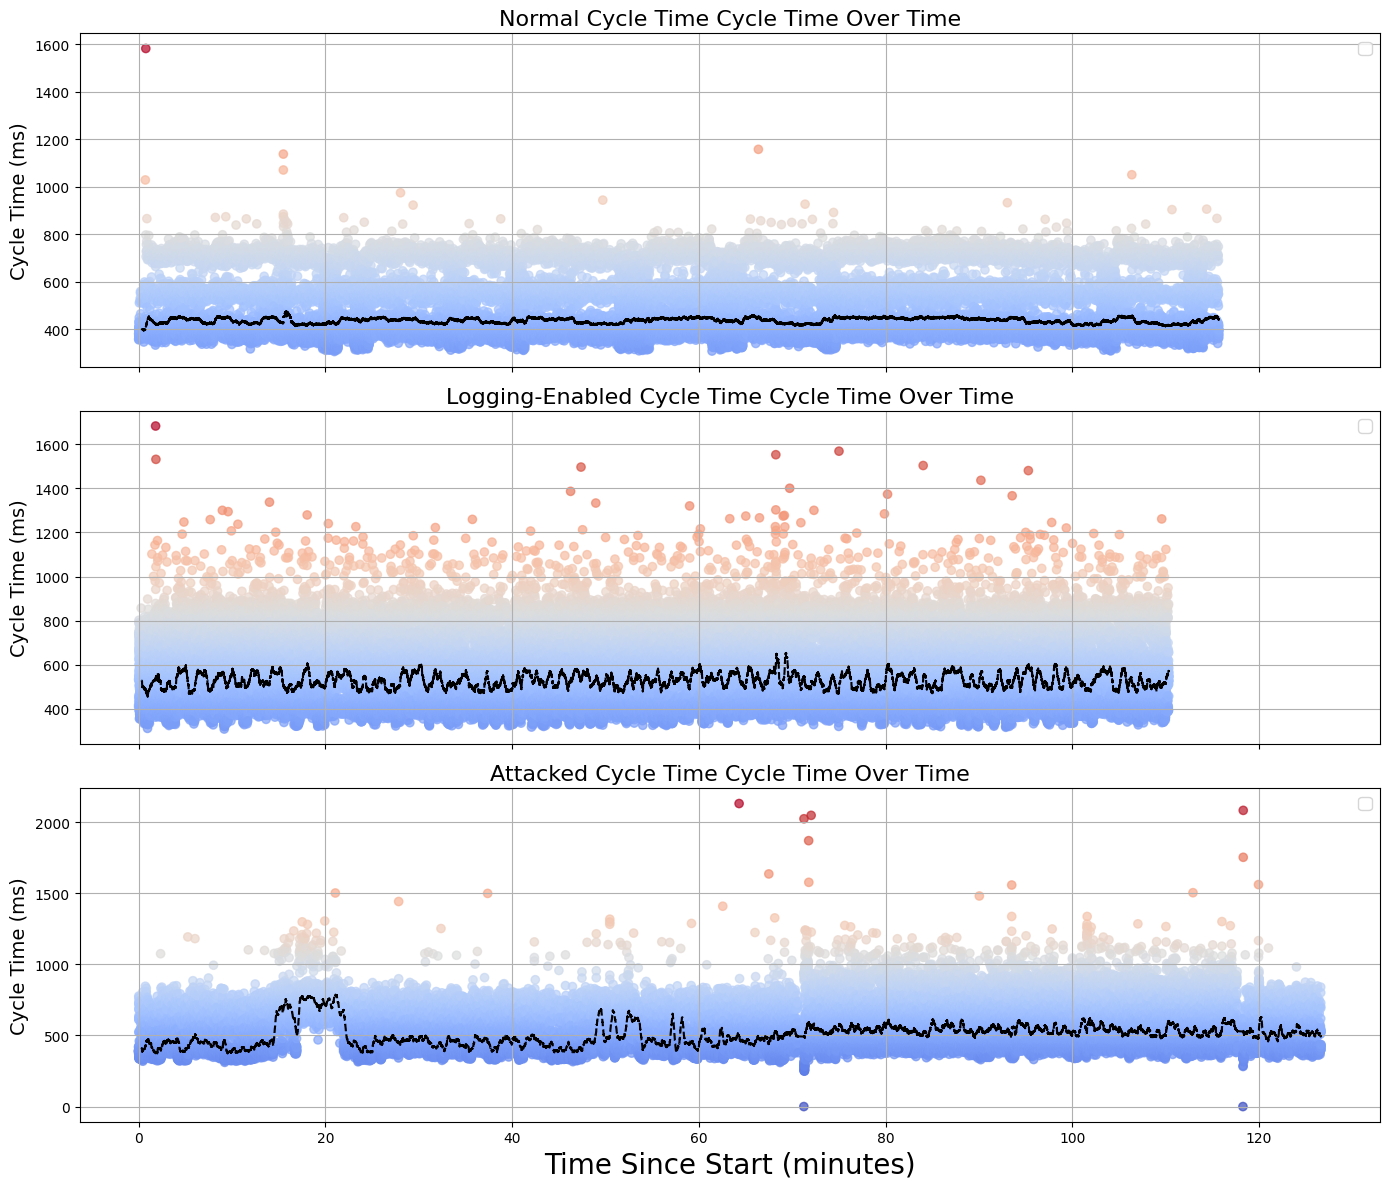

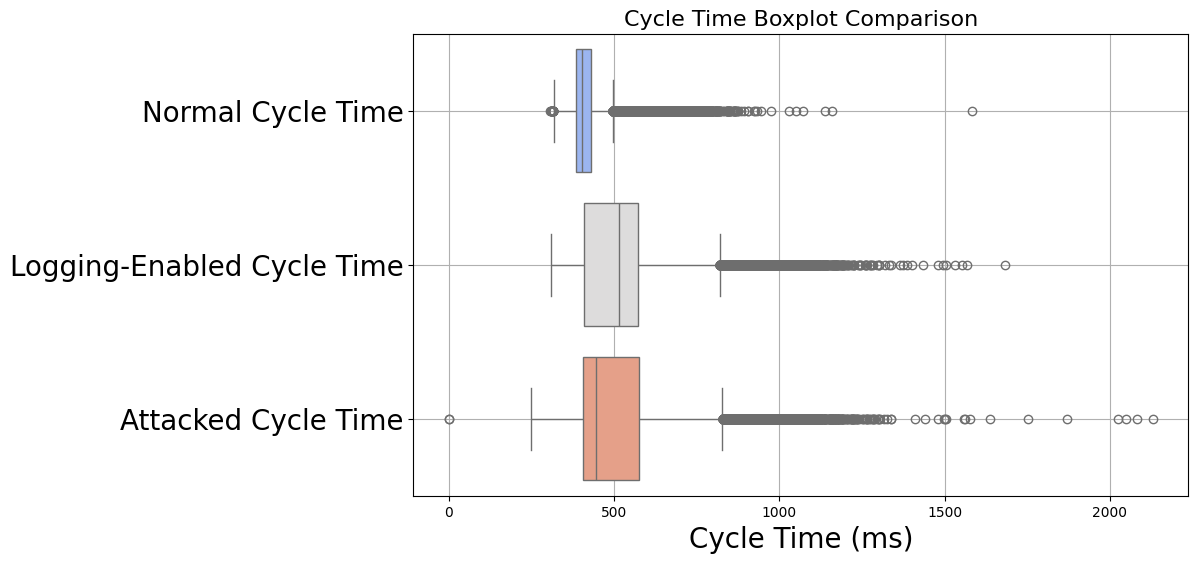

In [35]:
compare_cycle_times(df_normal_operation, df_logging_enable, df_logging_attack, ['Normal Cycle Time', 'Logging-Enabled Cycle Time', 'Attacked Cycle Time'])

                         Name        Mean  Median    Max  Min        Std  \
0           Normal Delay Time   94.715346    93.0    278   69  11.107644   
1  Logging-Enabled Delay Time  115.684985   104.0    346   68  34.529544   
2         Attacked Delay Time  116.957913   100.0  13598    0  65.238848   

   Number of Outliers  25th Percentile  50th Percentile  75th Percentile  
0                5381             87.0             93.0            101.0  
1                6302             94.0            104.0            122.0  
2                7017             91.0            100.0            121.0  


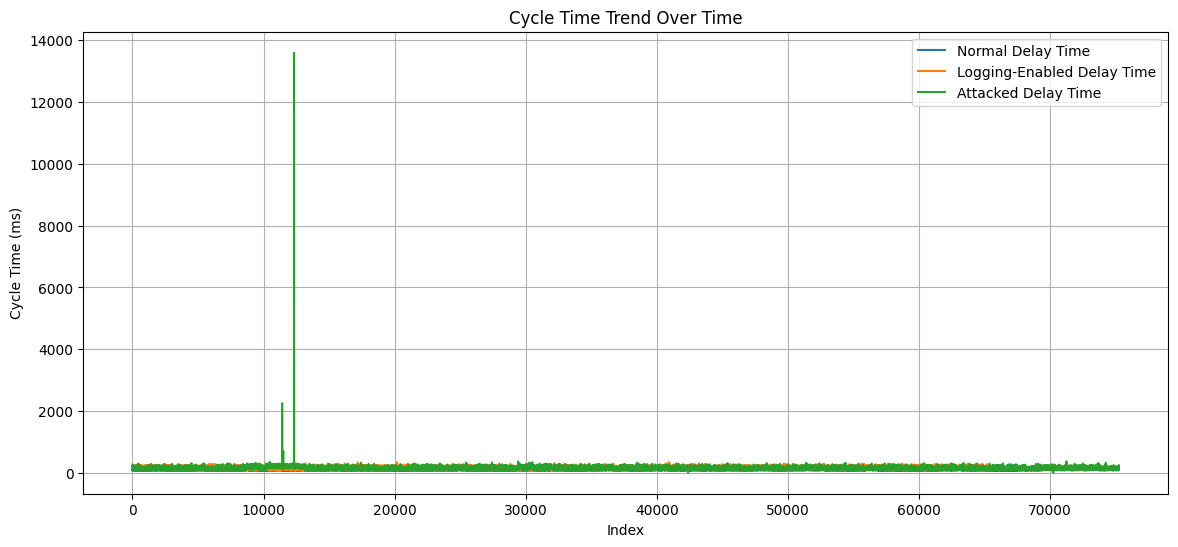

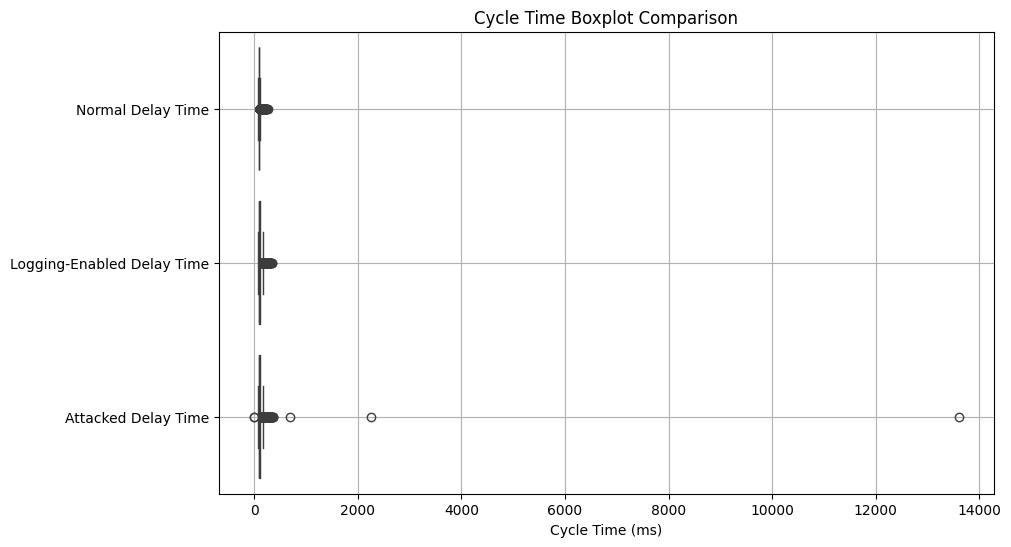

In [ ]:
compare_cycle_times(df_normal_operation['Total_Activation_delay'], df_logging_enable['Total_Activation_delay'], df_logging_attack['Total_Activation_delay'], ['Normal Delay Time', 'Logging-Enabled Delay Time', 'Attacked Delay Time'])

##Exception Count

In [5]:
df_stress_test.describe()

,Timestamp,ConsistentDataSeries,Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_ACTIVATION_DELAY,Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[1].TASK_INFOS[1].LAST_EXEC_DURATION,Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_ACTIVATION_DELAY,Arp.Plc.Eclr/code.ESM_DATA1.ESM_INFOS[2].TASK_INFOS[1].LAST_EXEC_DURATION,Arp.Plc.Eclr/code.ESM_DATA1.EXCEPTION_COUNT,Arp.Plc.Eclr/code.RTC_DT.DAY,Arp.Plc.Eclr/code.RTC_DT.HOURS,Arp.Plc.Eclr/code.RTC_DT.MINUTES,...,Arp.Plc.Eclr/code.USER_PART_DT.MEM_TOTAL,Arp.Plc.Eclr/code.USER_PART_DT.MEM_USAGE,Arp.Plc.Eclr/code.USER_PART_DT.MEM_USED,Arp.Plc.Eclr/code.cpu_1,Arp.Plc.Eclr/code.cpu_2,Arp.Plc.Eclr/code.temp,RecordAttribute,datetime,Total_Exec_Duration,Total_Activation_delay
count,1.156100e+04,11561.0,11561.000000,11561.000000,11561.000000,11561.000000,11561.0,11561.000000,11561.000000,11561.000000,...,11561.0,11561.0,1.156100e+04,11561.000000,11561.000000,11561.00000,11561.0,11561,11561.000000,11561.000000
mean,5.250287e+18,1.0,127.948707,274.170141,77.791022,484.198512,0.0,23.792406,4.774673,17.594672,...,511647744.0,27.0,1.275913e+08,80.604619,77.886342,56.70833,1.0,2024-08-24 00:05:37.520283648,758.368653,205.739728
min,5.250287e+18,1.0,31.000000,91.000000,34.000000,207.000000,0.0,23.000000,0.000000,0.000000,...,511647744.0,27.0,1.259151e+08,24.000000,11.000000,56.00000,1.0,2024-08-23 23:56:00,322.000000,70.000000
25%,5.250287e+18,1.0,111.000000,246.000000,72.000000,446.000000,0.0,24.000000,0.000000,4.000000,...,511647744.0,27.0,1.266606e+08,61.000000,54.000000,56.00000,1.0,2024-08-24 00:00:49,708.000000,185.000000
50%,5.250287e+18,1.0,138.000000,296.000000,81.000000,482.000000,0.0,24.000000,0.000000,9.000000,...,511647744.0,27.0,1.276150e+08,98.000000,98.000000,57.00000,1.0,2024-08-24 00:05:38,776.000000,221.000000
75%,5.250287e+18,1.0,154.000000,315.000000,90.000000,509.000000,0.0,24.000000,0.000000,14.000000,...,511647744.0,27.0,1.285530e+08,99.000000,99.000000,57.00000,1.0,2024-08-24 00:10:27,817.000000,241.000000
max,5.250287e+18,1.0,248.000000,994.000000,149.000000,940.000000,0.0,24.000000,23.000000,59.000000,...,511647744.0,27.0,1.294664e+08,100.000000,100.000000,58.00000,1.0,2024-08-24 00:15:16,1659.000000,354.000000
std,3.337518e+09,0.0,39.225756,76.023801,17.103514,99.352964,0.0,0.405602,9.328854,20.806018,...,0.0,0.0,1.059603e+06,24.900094,29.428482,0.51588,0.0,NaN,139.914301,50.321929


##Temprature

In [90]:
import matplotlib.pyplot as plt

def compare_temperature_trends(df1, df2, df3, names):

    dfs = [df1, df2, df3]
    colors = ['blue', 'green', 'red']
    markers = ['o', 's', 'D']

    plt.figure(figsize=(14, 6))

    for i, df in enumerate(dfs):
        time_in_minutes = (df.index - df.index.min()) / 600
        plt.plot(time_in_minutes, df['Arp.Plc.Eclr/code.temp'], label=f'{names[i]} - Temperature',
                 color=colors[i], linewidth=2, marker=markers[i], markersize=4, markevery=500)

    plt.title('Temperature Trends Over Time Across Scenarios')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.legend()
    plt.show()


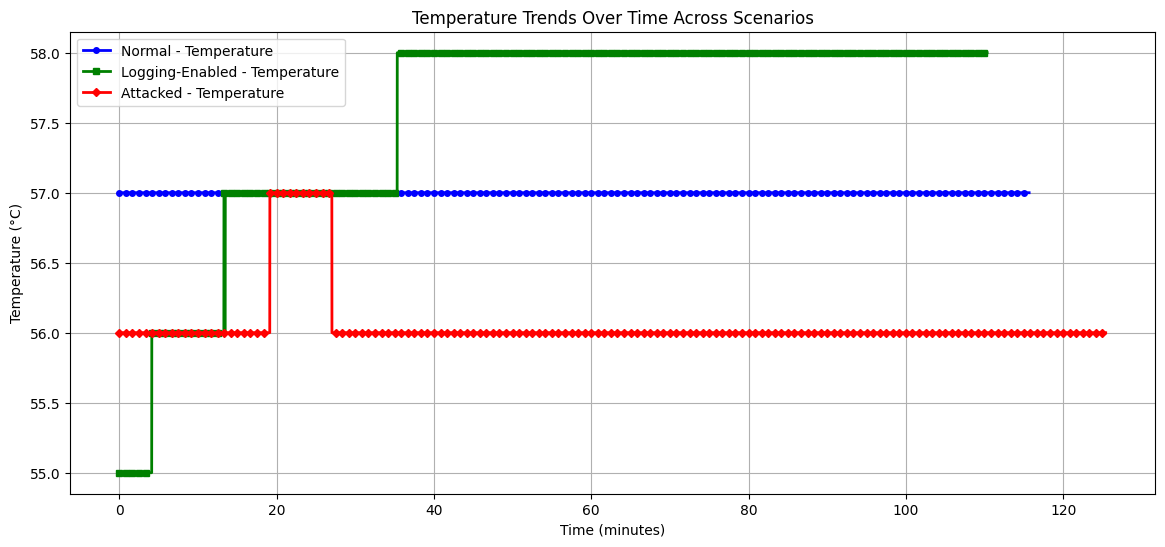

In [91]:
compare_temperature_trends(df_normal_operation, df_logging_enable, df_logging_attack, ['Normal', 'Logging-Enabled', 'Attacked'])

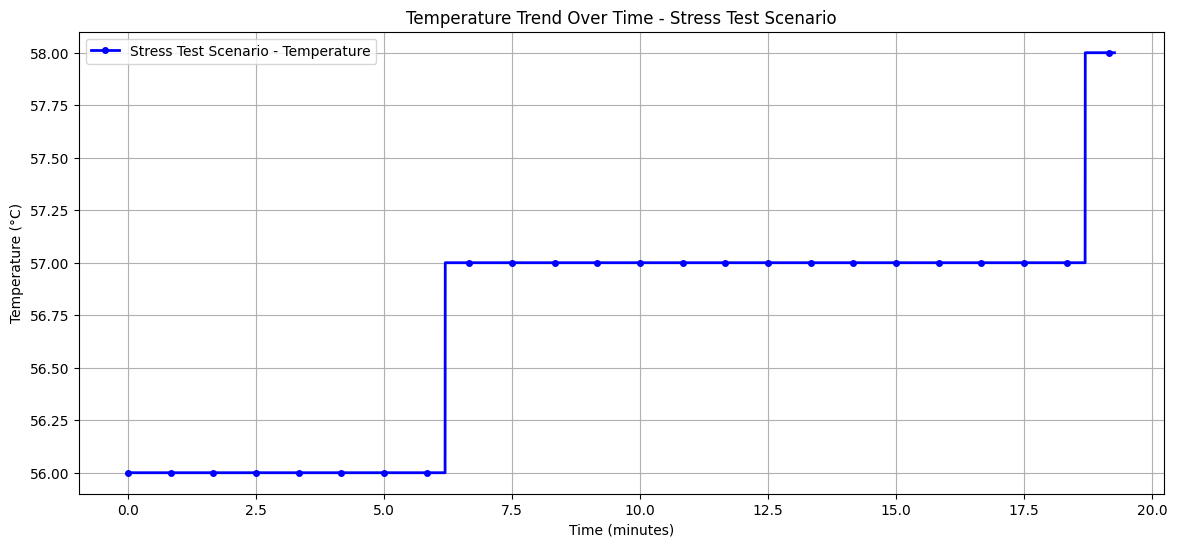

In [4]:
import matplotlib.pyplot as plt

def analyze_temperature_trend(df, name):

    time_in_minutes = (df.index - df.index.min()) / 600
    plt.figure(figsize=(14, 6))

    plt.plot(time_in_minutes, df['Arp.Plc.Eclr/code.temp'], label=f'{name} - Temperature',
             color='blue', linewidth=2, marker='o', markersize=4, markevery=500)

    plt.title(f'Temperature Trend Over Time - {name}')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.legend()
    plt.show()

analyze_temperature_trend(df_stress_test, "Stress Test Scenario")


##CPU usage

In [44]:
def compare_cpu_usage_separately_with_lines(df1, df2, df3, names):
    dfs = [df1, df2, df3]
    stats = []

    def calculate_stats(df, name):
        cpu_usage_avg = (df['Arp.Plc.Eclr/code.cpu_1'] + df['Arp.Plc.Eclr/code.cpu_2']) / 2
        total_points = len(cpu_usage_avg)
        outliers = cpu_usage_avg[(cpu_usage_avg > cpu_usage_avg.quantile(0.95)) | (cpu_usage_avg < cpu_usage_avg.quantile(0.05))]
        num_outliers = len(outliers)
        percentage_outliers = (num_outliers / total_points) * 100
        return {
            'Name': name,
            'Mean': cpu_usage_avg.mean(),
            'Median': cpu_usage_avg.median(),
            'Max': cpu_usage_avg.max(),
            'Min': cpu_usage_avg.min(),
            'Std': cpu_usage_avg.std(),
            'Number of Outliers': num_outliers,
            'Percentage of Outliers (%)': percentage_outliers,
            '25th Percentile': cpu_usage_avg.quantile(0.25),
            '50th Percentile': cpu_usage_avg.quantile(0.50),
            '75th Percentile': cpu_usage_avg.quantile(0.75)
        }

    for i, df in enumerate(dfs):
        stats.append(calculate_stats(df, names[i]))

    stats_df = pd.DataFrame(stats)
    print(stats_df)

    for i, df in enumerate(dfs):
        plt.figure(figsize=(14, 6))
        cpu_usage_avg = (df['Arp.Plc.Eclr/code.cpu_1'] + df['Arp.Plc.Eclr/code.cpu_2']) / 2
        plt.plot(cpu_usage_avg, label=f'{names[i]} - Average CPU Usage', color='blue')

        avg_line = [cpu_usage_avg.mean()] * len(cpu_usage_avg)
        plt.plot(cpu_usage_avg.index, avg_line, label='Average Line', linestyle='--', color='orange')

        x = cpu_usage_avg.index.values.reshape(-1, 1)
        y = cpu_usage_avg.values
        reg = LinearRegression().fit(x, y)
        reg_line = reg.predict(x)
        plt.plot(cpu_usage_avg.index, reg_line, label='Regression Line', linestyle='-', color='red')

        plt.title(f'Average CPU Usage Trend Over Time - {names[i]}')
        plt.xlabel('Index')
        plt.ylabel('Average CPU Usage (%)')
        plt.grid(True)
        plt.legend()
        plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[((df['Arp.Plc.Eclr/code.cpu_1'] + df['Arp.Plc.Eclr/code.cpu_2']) / 2).values for df in dfs], orient="h")
    plt.title('Average CPU Usage Boxplot Comparison')
    plt.yticks([0, 1, 2], names)
    plt.xlabel('Average CPU Usage (%)')
    plt.gca().set_ylabel('')
    plt.grid(True)
    plt.show()


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

def compare_cpu_usage_with_smooth_lines(df1, df2, df3, names):
    dfs = [df1, df2, df3]
    stats = []
    rolling_window = 500

    def calculate_stats(df, name):
        cpu_usage_avg = (df['Arp.Plc.Eclr/code.cpu_1'] + df['Arp.Plc.Eclr/code.cpu_2']) / 2
        total_points = len(cpu_usage_avg)
        outliers = cpu_usage_avg[(cpu_usage_avg > cpu_usage_avg.quantile(0.95)) | (cpu_usage_avg < cpu_usage_avg.quantile(0.05))]
        num_outliers = len(outliers)
        percentage_outliers = (num_outliers / total_points) * 100
        return {
            'Name': name,
            'Mean': cpu_usage_avg.mean(),
            'Median': cpu_usage_avg.median(),
            'Max': cpu_usage_avg.max(),
            'Min': cpu_usage_avg.min(),
            'Std': cpu_usage_avg.std(),
            'Number of Outliers': num_outliers,
            'Percentage of Outliers (%)': percentage_outliers,
            '25th Percentile': cpu_usage_avg.quantile(0.25),
            '50th Percentile': cpu_usage_avg.quantile(0.50),
            '75th Percentile': cpu_usage_avg.quantile(0.75)
        }

    for i, df in enumerate(dfs):
        stats.append(calculate_stats(df, names[i]))

    stats_df = pd.DataFrame(stats)
    print(stats_df)

    plt.figure(figsize=(14, 6))

    colors = ['blue', 'green', 'red']
    for i, df in enumerate(dfs):
        df['Time_Minutes'] = (df['datetime'] - df['datetime'].min()).dt.total_seconds() / 60
        cpu_usage_avg = (df['Arp.Plc.Eclr/code.cpu_1'] + df['Arp.Plc.Eclr/code.cpu_2']) / 2
        smooth_cpu_usage = cpu_usage_avg.rolling(rolling_window).mean()  # Applying rolling mean for smoother lines
        plt.plot(df['Time_Minutes'], smooth_cpu_usage, label=f'{names[i]} - Average CPU Usage', color=colors[i])

    plt.title('Average CPU Usage Trend Over Time (Smoothed)')
    plt.xlabel('Time Since Start (Minutes)')
    plt.ylabel('Average CPU Usage (%)')
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[((df['Arp.Plc.Eclr/code.cpu_1'] + df['Arp.Plc.Eclr/code.cpu_2']) / 2).values for df in dfs], orient="h", palette=colors)
    plt.title('Average CPU Usage Boxplot Comparison')
    plt.yticks([0, 1, 2], names)
    plt.xlabel('Average CPU Usage (%)')
    plt.gca().set_ylabel('')
    plt.grid(True)
    plt.show()


              Name       Mean  Median    Max   Min        Std  \
0           Normal  10.541401    10.5   57.5  10.0   1.284085   
1  Logging-Enabled  11.832095    10.5   99.0   0.0   6.120717   
2         Attacked  25.874841    15.0  100.0   0.0  21.926848   

   Number of Outliers  Percentage of Outliers (%)  25th Percentile  \
0                3268                    4.708459             10.5   
1                3434                    4.806898             10.5   
2                3685                    4.897140             11.5   

   50th Percentile  75th Percentile  
0             10.5             10.5  
1             10.5             11.0  
2             15.0             31.0  


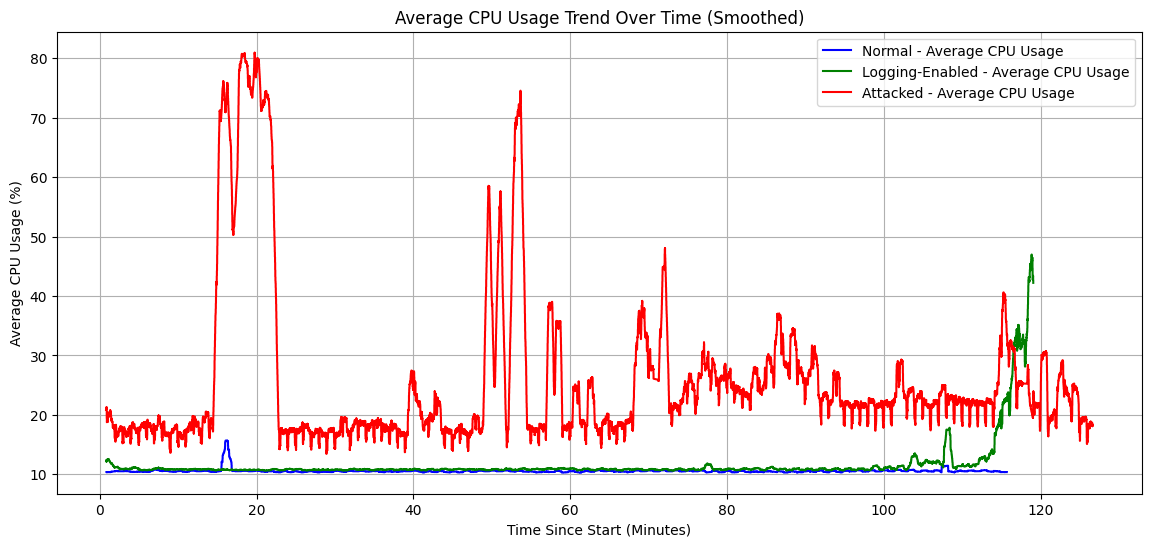

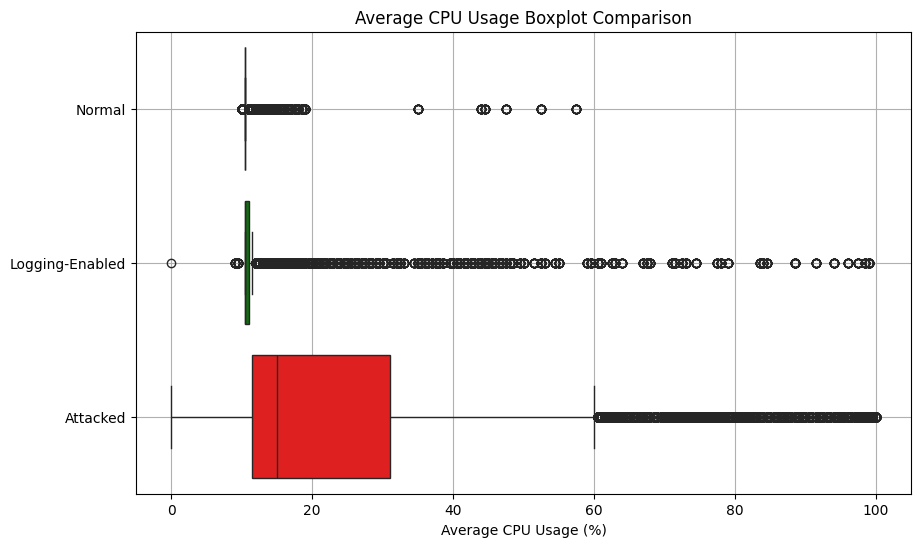

In [14]:
compare_cpu_usage_with_smooth_lines(df_normal_operation, df_logging_enable, df_logging_attack, ['Normal', 'Logging-Enabled', 'Attacked'])